<a href="https://colab.research.google.com/github/Mamadyc/Pr-diction-des-couts-d-assurance-maladies/blob/main/Analyse_de_Sentiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ANALYSE DES SENTIMENTS

In [ ]:
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
### Chargement de la base de donnée avec les commentaires
from google.colab import files
# Utilisez files.upload() pour télécharger le fichier depuis le système local


# Parcourez les fichiers téléchargés et chargez le fichier CSV
df = pd.read_csv('/content/comment_dentist_Alsace.csv')

# Affichez les premières lignes du DataFrame pour vérifier le chargement
print(df.head())



                 name     star  review  response  \
0  STIMPFLING MATHIEU  5 stars     NaN         1   
1  STIMPFLING MATHIEU  5 stars     NaN         0   
2  STIMPFLING MATHIEU  5 stars     NaN         0   
3  STIMPFLING MATHIEU  5 stars     NaN         0   
4  STIMPFLING MATHIEU  5 stars     NaN         0   

                                             review   
0  Dentiste sympathique et très professionnel qui...  
1  Excellent dentiste, et accueil parfait, et gra...  
2  mon dentiste depuis...30 ans et toujours au pe...  
3  le Dr Stimpfing m'a soigné une parodontite. De...  
4  Super dentiste , aucune douleur, bon acceuil ,...  


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
df.head()

,name,star,review,response,review
0,STIMPFLING MATHIEU,5 stars,NaN,1,Dentiste sympathique et très professionnel qui...
1,STIMPFLING MATHIEU,5 stars,NaN,0,"Excellent dentiste, et accueil parfait, et gra..."
2,STIMPFLING MATHIEU,5 stars,NaN,0,mon dentiste depuis...30 ans et toujours au pe...
3,STIMPFLING MATHIEU,5 stars,NaN,0,le Dr Stimpfing m'a soigné une parodontite. De...
4,STIMPFLING MATHIEU,5 stars,NaN,0,"Super dentiste , aucune douleur, bon acceuil ,..."


Analyse des differents states

<ipython-input-4-0686315ca61b>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(df, x='response', y='star', inner='box', palette='Dark2')


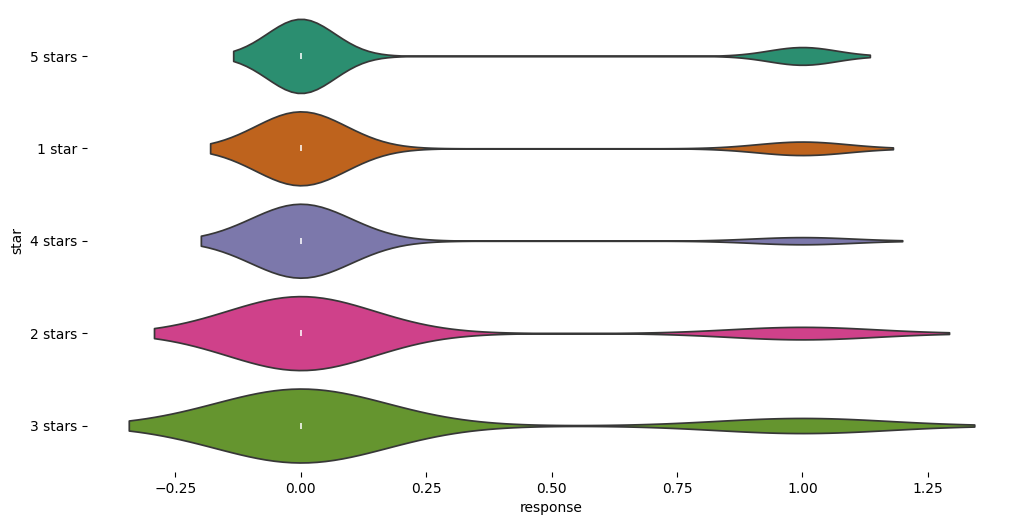

In [ ]:
# Répresentation graphique des star vs response
from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['star'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='response', y='star', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

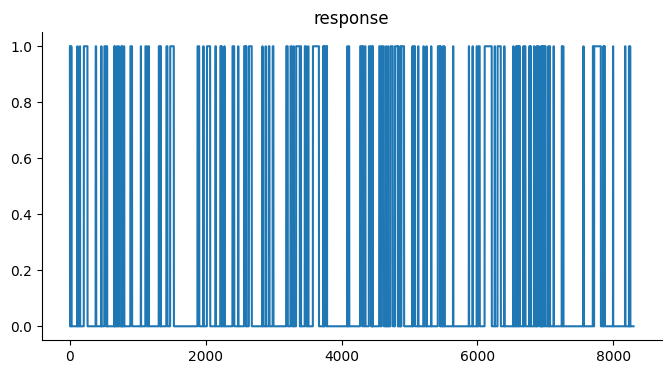

In [ ]:
# response

from matplotlib import pyplot as plt
df['response'].plot(kind='line', figsize=(8, 4), title='response')
plt.gca().spines[['top', 'right']].set_visible(False)

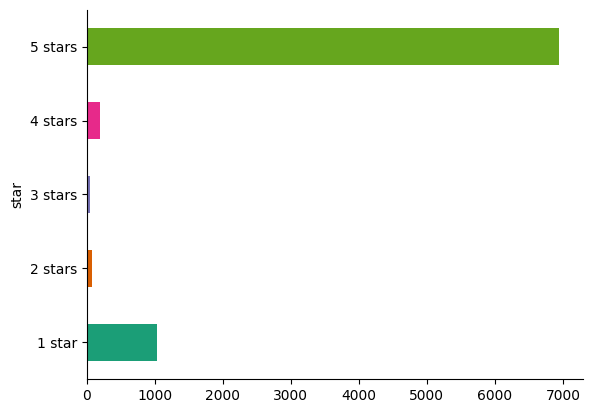

In [ ]:
# star

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('star').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

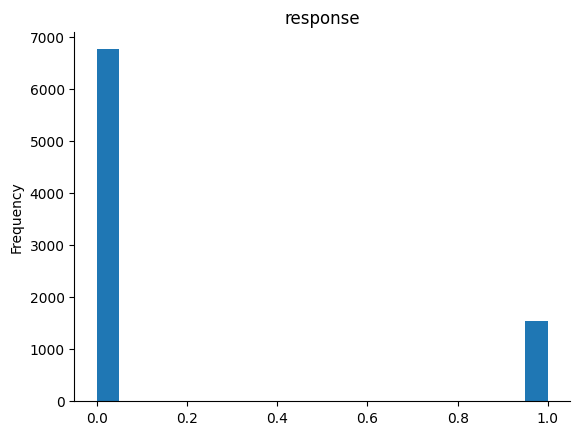

In [ ]:
# response

from matplotlib import pyplot as plt
df['response'].plot(kind='hist', bins=20, title='response')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
from textblob import TextBlob
import pandas as pd

# Fonction pour l'analyse de sentiment
def analyse_sentiment(commentaire):
    # Création d'un objet TextBlob
    blob = TextBlob(commentaire)
    # Calcul du sentiment
    sentiment = blob.sentiment.polarity
    return sentiment

# Exemple de commentaires (remplacez ceci par vos données)
commentaires = [
    "C'est un excellent produit, je suis très satisfait.",
    "Je ne recommanderais pas ce produit, c'est une perte d'argent.",
    "Le service clientèle est incroyable, je suis très heureux de leur réponse rapide.",
    "Le produit est arrivé en retard et endommagé, très décevant."
]

# Analyse de sentiment pour chaque commentaire
resultats_sentiment = [analyse_sentiment(commentaire) for commentaire in commentaires]

# Création d'un DataFrame pour stocker les commentaires et leur sentiment
df_commentaires = pd.DataFrame({
    'Commentaire': commentaires,
    'Sentiment': resultats_sentiment
})

# Affichage des résultats
print(df_commentaires)


                                         Commentaire  Sentiment
0  C'est un excellent produit, je suis très satis...        1.0
1  Je ne recommanderais pas ce produit, c'est une...        0.0
2  Le service clientèle est incroyable, je suis t...        0.0
3  Le produit est arrivé en retard et endommagé, ...       -0.9


In [ ]:
from textblob import TextBlob

# Liste des commentaires (remplacez ceci par vos données)
commentaires = [
    "C'est un excellent produit, je suis très satisfait.",
    "Je ne recommanderais pas ce produit, c'est une perte d'argent.",
    "Le service clientèle est incroyable, je suis très heureux de leur réponse rapide.",
    "Le produit est arrivé en retard et endommagé, très décevant."
]

# Fonction pour l'analyse de sentiment
def analyse_sentiment(commentaire):
    # Création d'un objet TextBlob
    blob = TextBlob(commentaire)
    # Calcul du sentiment
    sentiment = blob.sentiment.polarity
    return sentiment

# Analyse de sentiment pour chaque commentaire
resultats_sentiment = [analyse_sentiment(commentaire) for commentaire in commentaires]

# Affichage des résultats
for i, commentaire in enumerate(commentaires):
    print("Commentaire:", commentaire)
    print("Sentiment:", resultats_sentiment[i])
    if resultats_sentiment[i] > 0:
        print("Sentiment positif")
    elif resultats_sentiment[i] < 0:
        print("Sentiment négatif")
    else:
        print("Sentiment neutre")
    print()


Commentaire: C'est un excellent produit, je suis très satisfait.
Sentiment: 1.0
Sentiment positif

Commentaire: Je ne recommanderais pas ce produit, c'est une perte d'argent.
Sentiment: 0.0
Sentiment neutre

Commentaire: Le service clientèle est incroyable, je suis très heureux de leur réponse rapide.
Sentiment: 0.0
Sentiment neutre

Commentaire: Le produit est arrivé en retard et endommagé, très décevant.
Sentiment: -0.9
Sentiment négatif

